# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

Number of nodes: 19
Number of edges: 24


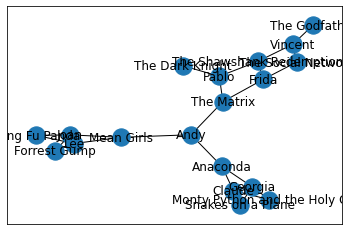

In [3]:
def answer_one():

    
    # YOUR CODE HERE
    
    G = nx.read_adjlist('Employee_Movie_Choices.txt', delimiter='\t')
    
    createdGraph = nx.Graph(G)
    
    return createdGraph
    
    # raise NotImplementedError()
 
nx.draw_networkx(answer_one())

num_nodes = answer_one().number_of_nodes()
num_edges = answer_one().number_of_edges()

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [3]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [5]:
def answer_two():
    
    # YOUR CODE HERE
    G = answer_one()

    # Add nodes with 'type' attribute
    for employee in employees:
        G.add_node(employee, type='employee')

    for movie in movies:
        G.add_node(movie, type='movie')

    return G

    #raise NotImplementedError()
    
graph = answer_two()

df = pd.DataFrame(index=graph.nodes)

df['type'] = pd.Series(nx.get_node_attributes(graph, 'type'))


df

,type
Andy,employee
Anaconda,movie
Mean Girls,movie
The Matrix,movie
Claude,employee
Monty Python and the Holy Grail,movie
Snakes on a Plane,movie
Frida,employee
The Shawshank Redemption,movie
The Social Network,movie


In [5]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [6]:
def answer_three():
    # YOUR CODE HERE
    G = answer_two()

    weighted_projected_graph = nx.bipartite.weighted_projected_graph(G, employees)

    return weighted_projected_graph

    #raise NotImplementedError()

EdgeDataView([('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Lee', 'Andy', {'weight': 1}), ('Lee', 'Joan', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2}), ('Georgia', 'Andy', {'weight': 1}), ('Frida', 'Andy', {'weight': 1})])

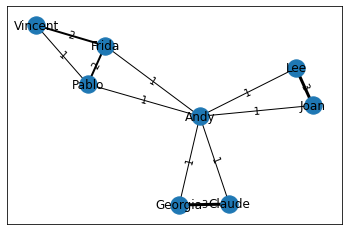

In [7]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [8]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [37]:
def answer_four():
    
    G = answer_two()

    weighted_projected_graph = answer_three()

    with open('Employee_Relationships.txt', 'r') as file:
        relationship_scores_data = [line.split() for line in file]

    relationship_df = pd.DataFrame(relationship_scores_data, columns=['Employee1', 'Employee2', 'Score'])
    relationship_df['Score'] = relationship_df['Score'].astype(int)
    
    #print(relationship_df)

    weighted_projected_df = pd.DataFrame(weighted_projected_graph.edges(data=True), columns=['Employee1', 'Employee2', 'Weight'])
    
    weighted_projected_df['Weight'] = weighted_projected_df['Weight'].apply(lambda x: x.get('weight', 0))
    
    #print(weighted_projected_df)

    merged_data = pd.merge(relationship_df, weighted_projected_df, on=['Employee1', 'Employee2'], how='left')

    merged_data['Weight'].fillna(0, inplace=True)
    
    merged_data['Score'].fillna(0, inplace=True)
    
    for index, row in merged_data.iterrows():
        employee1 = row['Employee1']
        employee2 = row['Employee2']

        reverse_pair_condition = ((weighted_projected_df['Employee1'] == employee2) & (weighted_projected_df['Employee2'] == employee1))

    
        if reverse_pair_condition.any():
            reversed_weight = weighted_projected_df.loc[reverse_pair_condition, 'Weight'].values[0]
            merged_data.at[index, 'Weight'] = reversed_weight

    #print(merged_data)
    
    correlation = np.corrcoef(merged_data['Score'], merged_data['Weight'])[0, 1]
    
    return correlation


    #raise NotImplementedError()
four = answer_four()
print(four)

   Employee1 Employee2  Score
0       Andy    Claude      0
1       Andy     Frida     20
2       Andy   Georgia    -10
3       Andy      Joan     30
4       Andy       Lee    -10
5       Andy     Pablo    -10
6       Andy   Vincent     20
7     Claude     Frida      0
8     Claude   Georgia     90
9     Claude      Joan      0
10    Claude       Lee      0
11    Claude     Pablo     10
12    Claude   Vincent      0
13     Frida   Georgia      0
14     Frida      Joan      0
15     Frida       Lee      0
16     Frida     Pablo     50
17     Frida   Vincent     60
18   Georgia      Joan      0
19   Georgia       Lee     10
20   Georgia     Pablo      0
21   Georgia   Vincent      0
22      Joan       Lee     70
23      Joan     Pablo      0
24      Joan   Vincent     10
25       Lee     Pablo      0
26       Lee   Vincent      0
27     Pablo   Vincent    -20
   Employee1 Employee2  Weight
0     Claude      Andy       1
1     Claude   Georgia       3
2    Vincent     Pablo       1
3    V

In [ ]:
ans_four = answer_four()